In [23]:
import numpy as np
import pandas as pd
import networkx as nx
import math

In [4]:
row_sum = 2
col_sum = 1
arr     = np.zeros((10, 10))
#generate a special case, with given row_sum and col_sum
for i in range(row_sum):
    arr.ravel()[i::arr.shape[1]+row_sum] = 1
arr

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [7]:
df = pd.DataFrame(arr).T
df.to_excel(excel_writer = "D:/cs/decision modelling/test.xlsx")

# convert to csv

In [8]:
df.to_csv("D:/cs/decision modelling/test.csv", index = None)

In [10]:
df1 = pd.read_csv("D:/cs/decision modelling/test.csv")
df1

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df1 = df1.to_numpy()

In [16]:
G = nx.from_numpy_matrix(df1, create_using=nx.MultiGraph)

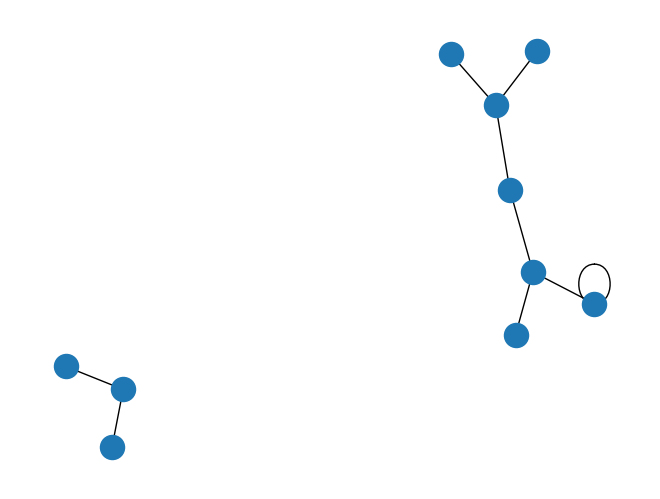

In [17]:
nx.draw(G)

## reflexive 

In [19]:
def is_reflexive_mat(mat):

    n = len(mat)
    for i in range(n):
        if not mat[i][i]:
            return False
    return True

In [20]:
is_reflexive_mat(df1)

False

## irreflexive 

In [69]:
def is_irreflexive_mat(mat):

    n = len(mat)
    for i in range(n):
        if mat[i][i]:
            return False
    return True

In [70]:
is_irreflexive_mat(df1)

False

# complete 

In [42]:
def is_complete_mat(mat):
    
    n = len(mat)

    #for i in range(0,math.ceil(n/2)):
    for i in range(n):
        for j in range(n):
            if not mat[i][j] and not mat[j][i]:
                return False
    return True

In [43]:
is_complete_mat(df1)

False

# symmetric

In [45]:
def is_symmetric_mat(mat):

    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j] and not mat[j][i]:
                return False
    return True

In [46]:
is_symmetric_mat(df1)

False

# Asymmetric

In [49]:
def is_a_symmetric_mat(mat):

    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j] and mat[j][i]:
                return False
    return True

In [50]:
is_a_symmetric_mat(df1)

False

# AntiSymmetric

In [58]:
def is_anti_symmetric_mat(mat):

    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j] and mat[j][i]:
                if mat[i][j] != mat[j][i]:
                    return False
    return True

In [59]:
is_anti_symmetric_mat(df1)

True

# transitive 

In [61]:
def is_transitive_mat(mat):

    n = len(mat)
    for i in range(n):
        for j in range(n):
            if mat[i][j]:
                 for k in range(n):
                        if mat[j][k] and not mat[i][k]:
                            return False
    return True

In [62]:
is_transitive_mat(df1)

False

# negative transitive 

In [63]:
def is_negative_transitive_mat(mat):

    n = len(mat)
    for i in range(n):
        for j in range(n):
            if not mat[i][j]:
                 for k in range(n):
                        if not mat[j][k] and mat[i][k]:
                            return False
    return True

In [64]:
is_negative_transitive_mat(df1)

False

# complete order 

In [67]:
def is_complete_order(mat):
    if is_anti_symmetric_mat(mat) and is_transitive_mat(mat):
        return True
    else:
        return False

In [68]:
is_complete_order(df1)

False

# complete preOrder

In [65]:
def is_complete_preorder(mat):
    if is_complete_mat(mat) and is_transitive_mat(mat):
        return True
    else:
        return False


In [66]:
is_complete_preorder(df1)

False

# strict order

In [71]:
def strict_order(mat):
    if not is_irreflexive_mat(mat) and not is_a_symmetric_mat(mat) and is_transitive_mat(mat):
        return True
    else:
        return False

In [72]:
strict_order(df1)

False

# indifference relation